## Telecom client churn forecast using Machine Learning

Interconnect telecom would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

### Interconnect's services

Interconnect mainly provides two types of services:

1. Landline communication. The telephone can be connected to several lines simultaneously.
2. Internet. The network can be set up via a telephone line (DSL, *digital subscriber line*) or through a fiber optic cable.

Some other services the company provides include:

- Internet security: antivirus software (*DeviceProtection*) and a malicious website blocker (*OnlineSecurity*)
- A dedicated technical support line (*TechSupport*)
- Cloud file storage and data backup (*OnlineBackup*)
- TV streaming (*StreamingTV*) and a movie directory (*StreamingMovies*)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

### Data Description

The data consists of files obtained from different sources:

- `contract.csv` — contract information
- `personal.csv` — the client's personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.

### Objectives

The objectives of this project is to:
- Build a machine learning model to forecast Interconnect telecom's client churn
- Apply exploratory data analysis in determining whether special promotional services and plan options will discourage client churn
- Analyze the speed and quality of prediction, time required for training, etc.

<hr>

 # Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#open_the_data">Open the data file and study the general information</a></li>
        <li><a href="#data_preprocessing">Data Preprocessing</a></li>
        <li><a href="#data_visualization">Exploratory Data Analysis</a></li>
        <li><a href="#model_training">Model Training</a></li>
        <li><a href="#model_testing">Model Testing</a></li>
        <li><a href="#model_analysis">Model Analysis</a></li>
        <li><a href="#overall_conclusion">Overall Conclusion</a></li>
    </ol>
</div>
<br>
<hr>

<div id="open_the_data">
    <h2>Open the data and study the general information</h2> 
</div>

We require the following libraries: *pandas* and *numpy* for data preprocessing and manipulation, *matplotlib* and *seaborn* for data visualization, *scikit-learn* for building our machine learning algorithms

In [1]:
import numpy as np
import pandas as pd
import time
from datetime import datetime

# matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn for statistical data visualization
import seaborn as sns

# import module for splitting and cross-validation using gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

# import modules for preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None # to avoid SettingWithCopyWarning after scaling

# import machine learning models
#from sklearn.linear_model import LinearRegression # import linear regression algorithm
#from sklearn.ensemble import RandomForestRegressor # import random forest algorithm
#from catboost import CatBoostRegressor, Pool # import catboost regressor
#from lightgbm import LGBMRegressor # import lightgbm regressor
#from xgboost import XGBRegressor # import xgboost regressor

from IPython.display import display

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


In [2]:
# read the data
try:
    contract_data = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Final Project/final_provider/contract.csv')
    internet_data = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Final Project/final_provider/internet.csv')
    personal_data = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Final Project/final_provider/personal.csv')
    phone_data = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Final Project/final_provider/phone.csv')
except:
    contract_data = pd.read_csv('https://code.s3.yandex.net/datasets/final_provider/contract.csv')
    internet_data = pd.read_csv('https://code.s3.yandex.net/datasets/final_provider/internet.csv')
    personal_data = pd.read_csv('https://code.s3.yandex.net/datasets/final_provider/personal.csv')
    phone_data = pd.read_csv('https://code.s3.yandex.net/datasets/final_provider/phone.csv')
print('Data has been read correctly!')

Data has been read correctly!


In [3]:
# function to determine if columns in file have null values
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [4]:
# study the general information about the contract dataset 
print('General information about the contract dataset')
get_info(contract_data)

General information about the contract dataset
----------------------------------------------------------------------------------------------------
Head:



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


----------------------------------------------------------------------------------------------------


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043
unique,7043,77,5,3,2,4,6531
top,7590-VHVEG,2014-02-01,No,Month-to-month,Yes,Electronic check,
freq,1,366,5174,3875,4171,2365,11



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(7043, 8)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




In [5]:
# study the general information about the internet dataset 
print('General information about the internet dataset')
get_info(internet_data)

General information about the internet dataset
----------------------------------------------------------------------------------------------------
Head:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


----------------------------------------------------------------------------------------------------


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(5517, 8)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




In [6]:
# study the general information about the personal dataset 
print('General information about the personal dataset')
get_info(personal_data)

General information about the personal dataset
----------------------------------------------------------------------------------------------------
Head:



,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


----------------------------------------------------------------------------------------------------


,customerID,gender,Partner,Dependents
count,7043,7043,7043,7043
unique,7043,2,2,2
top,7590-VHVEG,Male,No,No
freq,1,3555,3641,4933



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(7043, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




In [7]:
# study the general information about the phone dataset 
print('General information about the phone dataset')
get_info(phone_data)

General information about the phone dataset
----------------------------------------------------------------------------------------------------
Head:



,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


----------------------------------------------------------------------------------------------------


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(6361, 2)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




#### Conclusion

By looking at the general information about the data, we find that:
 - `contract_data` has 7043 rows and 8 columns with no missing values and no duplicated values
 - `internet_data` has 5517 rows and 8 columns with no missing values and no duplicated values
 - `personal_data` has 7043 rows and 5 columns with no missing values and no duplicated values
 - `phone_data` has 6361 rows and 2 columns with no missing values and no duplicated values
 
We need to change datatype to the right datatype. For instance, in `contract_data`, we need to change `BeginDate`, `EndDate` to `Datetime` and `TotalCharges` to `float`. We also need to preprocess the data and generate new features for machine learning.

<div id="data_preprocessing">
    <h2>Data Preprocessing</h2> 
</div>

In this section, we would be wrangling the data. We would have to merge the dataset, replace column names, change datatypes and perform feature engineering. 

### Merge Datasets

Before we begin to preprocess the data, we can merge all the individual datasets into one dataframe using the `merge()` function in pandas.

In [8]:
# joining datasets 
merged_df = pd.merge(contract_data, personal_data, on="customerID")
merged_df1 = pd.merge(merged_df, phone_data, on="customerID")
merged_df2 = pd.merge(merged_df1, internet_data, on="customerID")
merged_df2.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4431,9644-UMGQA,2019-08-01,No,Month-to-month,Yes,Electronic check,49.15,295.65,Male,0,Yes,Yes,No,DSL,Yes,No,No,No,No,No
718,3422-WJOYD,2017-10-01,No,One year,No,Mailed check,54.35,1426.45,Male,0,Yes,No,No,DSL,Yes,No,No,Yes,No,No
2824,2777-PHDEI,2019-12-01,2020-01-01 00:00:00,Month-to-month,No,Electronic check,78.05,78.05,Female,0,No,No,No,Fiber optic,No,No,No,No,Yes,No
1576,1399-UBQIU,2019-03-01,No,Month-to-month,Yes,Electronic check,69.35,712.25,Male,0,No,No,No,DSL,No,No,Yes,No,Yes,Yes
271,0533-BNWKF,2015-05-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,85.45,4874.7,Female,1,Yes,No,Yes,Fiber optic,No,Yes,Yes,No,No,No


In [9]:
# create copy of dataset
telecom_df = merged_df2.copy()
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 4834
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4835 non-null   object 
 1   BeginDate         4835 non-null   object 
 2   EndDate           4835 non-null   object 
 3   Type              4835 non-null   object 
 4   PaperlessBilling  4835 non-null   object 
 5   PaymentMethod     4835 non-null   object 
 6   MonthlyCharges    4835 non-null   float64
 7   TotalCharges      4835 non-null   object 
 8   gender            4835 non-null   object 
 9   SeniorCitizen     4835 non-null   int64  
 10  Partner           4835 non-null   object 
 11  Dependents        4835 non-null   object 
 12  MultipleLines     4835 non-null   object 
 13  InternetService   4835 non-null   object 
 14  OnlineSecurity    4835 non-null   object 
 15  OnlineBackup      4835 non-null   object 
 16  DeviceProtection  4835 non-null   object 


### Replace column names

The next step in data preprocessing will be to replace columns names in our dataset.

In [10]:
# rename columns
telecom_df = telecom_df.rename(columns={'customerID': 'customer_id', 'BeginDate': 'begin_date', 'EndDate': 'end_date', 'Type': 'type',
       'PaperlessBilling': 'paperless_billing', 'PaymentMethod': 'payment_method', 'MonthlyCharges': 'monthly_charges', 'TotalCharges': 'total_charges',
       'gender': 'gender', 'SeniorCitizen': 'senior_citizen', 'Partner': 'partner', 'Dependents': 'dependents', 'MultipleLines': 'multiple_lines',
       'InternetService': 'internet_service', 'OnlineSecurity': 'online_security', 'OnlineBackup': 'online_backup', 'DeviceProtection': 'device_protection',
       'TechSupport': 'tech_support', 'StreamingTV': 'streaming_tv', 'StreamingMovies': 'streaming_movies'})

We renamed column names so that the column names will be uniform. i.e., using snake case for improved readability. The `rename()` function in pandas is used to make these changes.

### Change Datatypes 

Next, we change datatypes to the right format. For instance, `begin_date` and `end_date` will be changed to `Datetime`, `monthly_charges` and `total_charges` to `float32`, `senior_citizen` to `int32` datatypes.

In [11]:
# function to change data to the right type
def change_datatype(df, cols, type_val):
    for col in cols:
        df[col] = df[col].astype(type_val)

# create new end date feature
list_value = []
for value in telecom_df.end_date:
    if value != 'No':
        datetime_value = datetime.strptime(value, '%Y-%m-%d %H:%M:%S')
        list_value.append(datetime_value)
    else:
        list_value.append(datetime.now())
EndDate_value = pd.to_datetime(list_value)
telecom_df.insert(3, 'end_date_value', EndDate_value)

# prepare TotalChargers 
telecom_df.loc[telecom_df['total_charges'].isin([' ']),'total_charges'] = 0

# change datatypes
change_datatype(telecom_df, ['begin_date'], 'datetime64[ns]')
change_datatype(telecom_df, ['monthly_charges', 'total_charges'], 'float32')
change_datatype(telecom_df, ['senior_citizen'], 'int32')

In [12]:
# check data information
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 4834
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        4835 non-null   object        
 1   begin_date         4835 non-null   datetime64[ns]
 2   end_date           4835 non-null   object        
 3   end_date_value     4835 non-null   datetime64[ns]
 4   type               4835 non-null   object        
 5   paperless_billing  4835 non-null   object        
 6   payment_method     4835 non-null   object        
 7   monthly_charges    4835 non-null   float32       
 8   total_charges      4835 non-null   float32       
 9   gender             4835 non-null   object        
 10  senior_citizen     4835 non-null   int32         
 11  partner            4835 non-null   object        
 12  dependents         4835 non-null   object        
 13  multiple_lines     4835 non-null   object        
 14  internet

### Feature engineering

Here, we will create new features such as length of tenure `tenure`, the target end date `exited` denoted as 0 for no churn and 1 for churn, `service_count` denoting the number of products (or services) the customer is currently using, `has_crcard` indicating the customer uses credit card for payment, `year`, `month` and `dayofweek` the customer began using Interconnect's services.

In [13]:
# change date type to datetime and split into day, month and year
def new_date_features(df):
    columns = df.columns.tolist()
    idx = [columns.index(x) for x in columns if 'begin_date' in x][0]
    
    df[columns[idx]] = pd.to_datetime(df[columns[idx]])
    df['dayofweek'] = df[columns[idx]].dt.day_name()
    df['month'] = df[columns[idx]].dt.month_name()
    df['year'] = df[columns[idx]].dt.year
    return df;    

In [14]:
# add new features to data
new_date_features(telecom_df)
telecom_df['tenure'] = telecom_df['end_date_value'].dt.year - telecom_df['begin_date'].dt.year
telecom_df['has_crcard'] = [1 if x == 'Credit card (automatic)' else 0 for x in telecom_df['payment_method']]
telecom_df['exited'] = [1 if x != 'No' else 0 for x in telecom_df['end_date']]
telecom_df['service_count'] = [x.count('Yes') for x in zip(telecom_df['online_security'], telecom_df['online_backup'], telecom_df['device_protection'], 
                                                           telecom_df['tech_support'], telecom_df['streaming_tv'], telecom_df['streaming_movies'])]
change_datatype(telecom_df, ['year', 'tenure', 'has_crcard', 'exited', 'service_count'], 'int32') # reduce memory usage by changing datatypes

In [15]:
# check dataframe
telecom_df.head()

,customer_id,begin_date,end_date,end_date_value,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,...,tech_support,streaming_tv,streaming_movies,dayofweek,month,year,tenure,has_crcard,exited,service_count
0,5575-GNVDE,2017-04-01,No,2022-01-01 10:35:34.082657,One year,No,Mailed check,56.950001,1889.500000,Male,...,No,No,No,Saturday,April,2017,5,0,0,2
1,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,2019-12-01 00:00:00.000000,Month-to-month,Yes,Mailed check,53.849998,108.150002,Male,...,No,No,No,Tuesday,October,2019,0,0,1,2
2,9237-HQITU,2019-09-01,2019-11-01 00:00:00,2019-11-01 00:00:00.000000,Month-to-month,Yes,Electronic check,70.699997,151.649994,Female,...,No,No,No,Sunday,September,2019,0,0,1,0
3,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,2019-11-01 00:00:00.000000,Month-to-month,Yes,Electronic check,99.650002,820.500000,Female,...,No,Yes,Yes,Friday,March,2019,0,0,1,3
4,1452-KIOVK,2018-04-01,No,2022-01-01 10:35:34.085650,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,Male,...,No,Yes,No,Sunday,April,2018,4,1,0,2


Using list comprehension, we have been able to generate new features that are relevant to the dataset. We engineered features such as `tenure`, `exited`, `service_count`, `has_crcard`, `year`, `month` and `dayofweek`. All these features will help our machine learning model to avoid bias when building the model. We also don't want to have too many features to avoid high variance - when the model is too complex that it doesn't generalize well to the test data or it *overfits* the data.

In [16]:
# recheck dataframe information
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 4834
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        4835 non-null   object        
 1   begin_date         4835 non-null   datetime64[ns]
 2   end_date           4835 non-null   object        
 3   end_date_value     4835 non-null   datetime64[ns]
 4   type               4835 non-null   object        
 5   paperless_billing  4835 non-null   object        
 6   payment_method     4835 non-null   object        
 7   monthly_charges    4835 non-null   float32       
 8   total_charges      4835 non-null   float32       
 9   gender             4835 non-null   object        
 10  senior_citizen     4835 non-null   int32         
 11  partner            4835 non-null   object        
 12  dependents         4835 non-null   object        
 13  multiple_lines     4835 non-null   object        
 14  internet

#### Conclusion

We carried out data preprocessing in order to merge the datasets, replace column names, change datatype, and generate new features for machine learning. We applied the SQL-flavored merging with pandas to merge the dataset. We renamed column names for improved readability, and change datatypes to the right format in order to reduce memory requirement during computation. We performed feature engineering in order to generate new features that will be helpful in exploring the data and useful for our machine learning process. Now the data is ready for further exploration.

<div id="data_visualization">
    <h2>Exploratory Data Analysis</h2> 
</div>

In exploring the data, we would be asking various questions that need answers in order to uncover or understand the data.

### What payment type and payment methods are unique to Interconnect's customer?

In [17]:
unique_payment_type_count = (telecom_df['type'].value_counts() / telecom_df['type'].value_counts().sum() * 100).tolist()   

# unique payment type
unique_payment_type = telecom_df['type'].value_counts().reset_index().rename(columns={'index': 'type', 'type': 'unique count'})
unique_payment_type['percentage split (%)'] = ['{:.2f}'.format(x) for x in unique_payment_type_count]
unique_payment_type

,type,unique count,percentage split (%)
0,Month-to-month,2975,61.53
1,One year,964,19.94
2,Two year,896,18.53


In [18]:
unique_payment_method_count = (telecom_df['payment_method'].value_counts() / telecom_df['payment_method'].value_counts().sum() * 100).tolist()

# unique payment method
unique_payment_method = telecom_df['payment_method'].value_counts().reset_index().rename(columns={'index': 'payment method', 'payment_method': 'count'})
unique_payment_method['% payment split'] = ['{:.2f}'.format(x) for x in unique_payment_method_count]
unique_payment_method

,payment method,count,% payment split
0,Electronic check,2017,41.72
1,Bank transfer (automatic),1069,22.11
2,Credit card (automatic),1037,21.45
3,Mailed check,712,14.73


From the analysis above, we see that most Interconnect customers prefer month-to-month payment with 61% of payment done using this medium. Also, electronic check was frequently used to make payment amongst the payment method available.

### Can we deduce a relationship between payment method and total charges?

In [19]:
# total charges grouped by payment method
total_charges_grouped = telecom_df.groupby('payment_method', as_index=False).agg({'total_charges': 'sum'}).sort_values(
    by='total_charges', ascending=False, ignore_index=True)
total_charges_grouped

,payment_method,total_charges
0,Electronic check,4614144.500
1,Bank transfer (automatic),4107600.500
2,Credit card (automatic),4084357.500
3,Mailed check,1218636.125


We can agree that customers making payment with electronic check had the highest total charges. With this knowledge, marketing team can channel more marketing campaign to make these set of customers use more services. Customers who mail-in check on the other hand had the lowest total charges. Here, marketing team can device new marketing campaign to make the these sets of customers to embrace either the bank transfer method or the electronic check method. If we can get all the customers sending in mail-in checks to use the electronic check, then we would have more total customer charges which translate to more revenue for Interconnect telecom.

### Can we deduce a relationship between payment type and total monthly charges?

In [20]:
# total monthly charges grouped by payment type
(telecom_df.groupby('type', as_index=False)
     .agg({'monthly_charges': 'sum', 'total_charges': 'sum'})
     .sort_values(by='total_charges', ascending=False, ignore_index=True)
)

,type,monthly_charges,total_charges
0,Two year,80824.250000,5127974.00
1,Month-to-month,232754.906250,4921343.00
2,One year,81707.101562,3975421.75


We can see that customers on a two-year contract bring in more total revenue than customers on a one year contract. The marketing team at Interconnect can introduce more two year contract plan to entice more customers to sign up for a two year contract. 

### Services count by contract type

In [21]:
# services count grouped by contract type
(telecom_df.groupby('type', as_index=False)
     .agg({'service_count': 'sum'})
     .sort_values(by='service_count', ascending=False, ignore_index=True)
)

,type,service_count
0,Month-to-month,5369
1,Two year,3992
2,One year,3245


We observe that customers on a month-to-month contract use more services than customers on a one year contract. This knowledge would inform advertisement campaigns and marketing efforts.

### What gender have the most total charges and service count?

In [22]:
# total charges grouped by gender
gender_charges = telecom_df.groupby('gender', as_index=False).agg({'total_charges': 'sum', 'service_count': 'sum'}).sort_values(by='total_charges', ascending=False, ignore_index=True)
change_datatype(gender_charges, ['total_charges'], 'int32')
gender_charges['percent_total_charges'] = gender_charges['total_charges'] / sum(gender_charges['total_charges']) * 100
gender_charges

,gender,total_charges,service_count,percent_total_charges
0,Male,7059904,6255,50.338933
1,Female,6964835,6351,49.661067


From the above, we can see that the female gender contributed almost as much as the male to the total charges and Interconnect's revenue. In addition, the female used more services than the male folks even though this did not translate to increased revenue or total charges.

In [23]:
# function to plot seaborn barplot
def plot_snsbar(df, x, y, title):
    xlabel = str(x.replace('_', ' ').capitalize())
    ylabel = str(y.replace('_', ' ').capitalize())
    # create grouped data
    data = df.groupby([x])[y].count().sort_values(ascending=False).reset_index()
    fig, ax=plt.subplots(figsize=(10,6))
    ax = sns.barplot(x = x, y = y, data=data)
    ax.set_title(title, fontdict={'size':12})
    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    ax.set_xticklabels(data[x], rotation=90);

### Check correlation in data

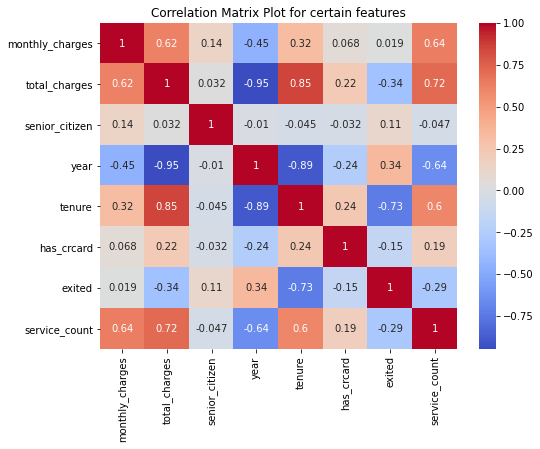

In [24]:
# correlation matrix of features
plt.figure(figsize=(8, 6))
corrMatrix = telecom_df.corr()
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Plot for certain features')
plt.show();

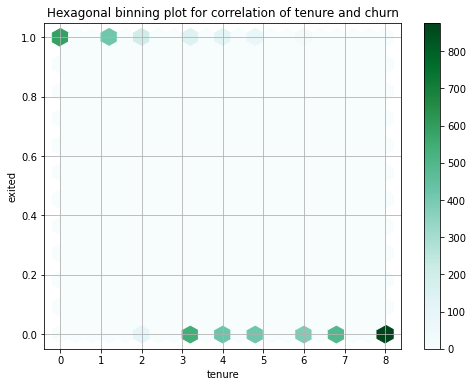

In [25]:
# correlation of tenure and churn
telecom_df.plot(
    x='tenure', y='exited', title = 'Hexagonal binning plot for correlation of tenure and churn', 
    kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True
);

From the correlation plot, we can see that there is a strong negative correlation between `tenure` and `exited` (or churn). Customers with less tenure are more likely to churn than well-established customers. To prevent churn, Interconnect telecom must introduce promotion and increase service offering in other to keep customers for longer. We see that the longer a customer stays with Interconnect telecoms, the less likely the customers churn. Whether a customer made subscription on a month-to-month basis did not really affect churn. 

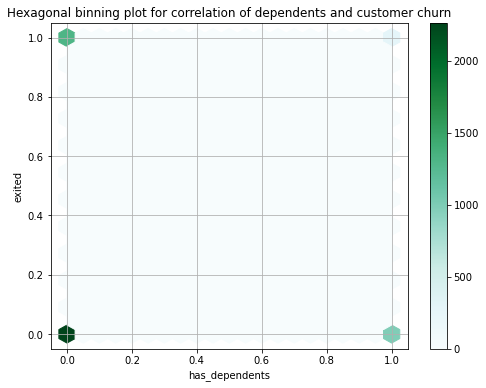

In [26]:
# correlation of dependents on customer churn
telecom_df['has_dependents'] = [1 if x != 'No' else 0 for x in telecom_df['dependents']]
telecom_df.plot(
    x='has_dependents', y='exited', title = 'Hexagonal binning plot for correlation of dependents and customer churn', 
    kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True
);

We can see that more customers without dependents stayed longer with Interconnect telecoms than customers with dependent. This is reasonable because having dependent tends to increase your average expenses. It would make sense for Interconnect to target customers with less dependents. 

### Can contract type affect customer churn?

In [27]:
# effect of contract type on customer churn
contract_type_percent = telecom_df.groupby('type', as_index=False).agg({'exited': 'sum'}).sort_values(by='exited', ascending=False, ignore_index=True)
contract_type_effect = (telecom_df['type'].value_counts() / telecom_df['type'].value_counts().sum() * 100).tolist()
contract_type_percent['% exit percent'] = ['{:.2f}'.format(x) for x in contract_type_effect]
contract_type_percent

,type,exited,% exit percent
0,Month-to-month,1403,61.53
1,One year,143,19.94
2,Two year,40,18.53


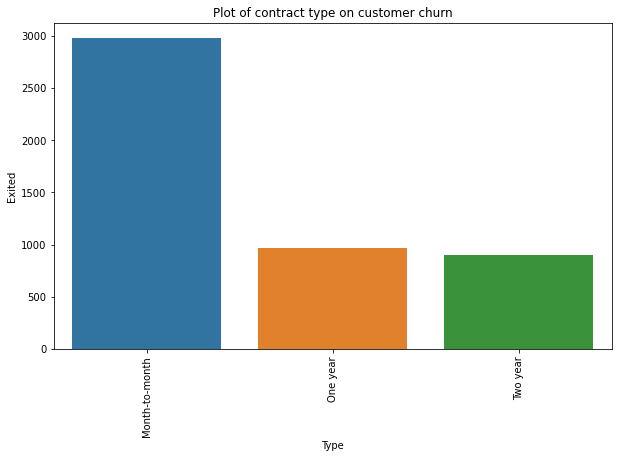

In [28]:
# plot of contract type on customer churn
plot_snsbar(telecom_df, 'type', 'exited', 'Plot of contract type on customer churn')

We visualized the contract type to see whether customers with shorter contract churn faster than customers with year-long contracts. Our analysis shows that customers with two-year long contract tends to stay longer while customers on a month-to-month contract type churned faster.

### What are the top 5 services offered?

In [29]:
# we create a copy of the dataframe to use for encoding
telecom_df_encode = telecom_df.copy()

# encoding services offered 
online_security = {'online_security':{'Yes': 1, 'No': 0}}
online_backup = {'online_backup':{'Yes': 1, 'No': 0}}
device_protection = {'device_protection':{'Yes': 1, 'No': 0}}
tech_support = {'tech_support':{'Yes': 1, 'No': 0}}
streaming_tv = {'streaming_tv':{'Yes': 1, 'No': 0}}
streaming_movies = {'streaming_movies':{'Yes': 1, 'No': 0}}

telecom_df_encode.replace(online_security, inplace =True)
telecom_df_encode.replace(online_backup, inplace =True)
telecom_df_encode.replace(device_protection, inplace =True)
telecom_df_encode.replace(tech_support, inplace =True)
telecom_df_encode.replace(streaming_tv, inplace =True)
telecom_df_encode.replace(streaming_movies, inplace =True)

telecom_services_data = telecom_df_encode[['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'exited']]
telecom_services_data = telecom_services_data.transpose()
telecom_services_data

,0,1,2,3,4,5,6,7,8,9,...,4825,4826,4827,4828,4829,4830,4831,4832,4833,4834
online_security,1,1,0,0,0,0,1,1,0,0,...,0,1,0,0,1,0,1,0,0,1
online_backup,0,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,1,0,0
device_protection,1,0,0,1,0,1,0,0,1,1,...,0,0,0,0,1,0,1,1,0,1
tech_support,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
streaming_tv,0,0,0,1,1,1,0,0,1,1,...,1,0,0,0,1,1,1,1,0,1
streaming_movies,0,0,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,1,1,0,1
exited,0,1,1,1,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [30]:
# getting dataframe showing services and percentage count 
telecom_services_data['count'] = telecom_services_data.sum(axis=1)
telecom_services_df = telecom_services_data.reset_index(inplace=False)
telecom_services_df = telecom_services_df[['index', 'count']].rename(columns={'index': 'services'})
telecom_services_df['% service offered']  = telecom_services_df['count'] / telecom_services_df['count'].sum() * 100
telecom_services = telecom_services_df.copy()
telecom_services.sort_values('% service offered', axis = 0, ascending = False, inplace = True, ignore_index=True)
telecom_services

,services,count,% service offered
0,streaming_movies,2434,17.150507
1,streaming_tv,2422,17.065953
2,online_backup,2142,15.093010
3,device_protection,2117,14.916855
4,tech_support,1755,12.366122
5,online_security,1736,12.232244
6,exited,1586,11.175310


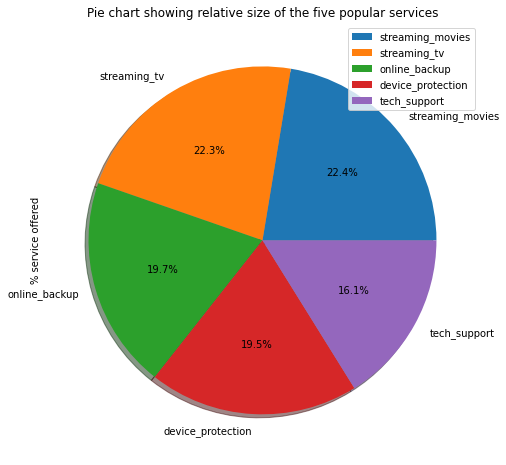

In [31]:
# plot of top 5 Interconnect service by count 
telecom_services_pie = telecom_services.head(5)
(telecom_services_pie.set_index('services').plot(y='% service offered', kind='pie', 
                      title = 'Pie chart showing relative size of the five popular services', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

From the plot of top 5 services offered by Interconnect telecoms, we can see that `streaming_tv`, `streaming_videos` are in high demand. 

### Can number of services offered affect customer churn?

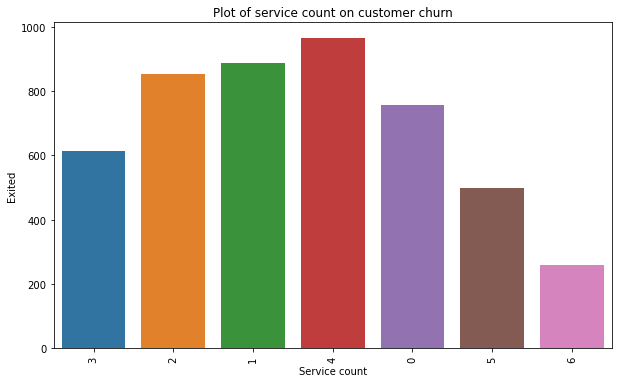

In [32]:
# plot of service count on customer churn
plot_snsbar(telecom_df, 'service_count', 'exited', 'Plot of service count on customer churn')

The service count has very weak correlation with customer churn. From the plot, we see that customers using between 5 and 6 services churned less. This indicates that having customers to sign up for more than 5 services at a time may likely prevent customer churn.

### What about the day of the week effect on customer churn?

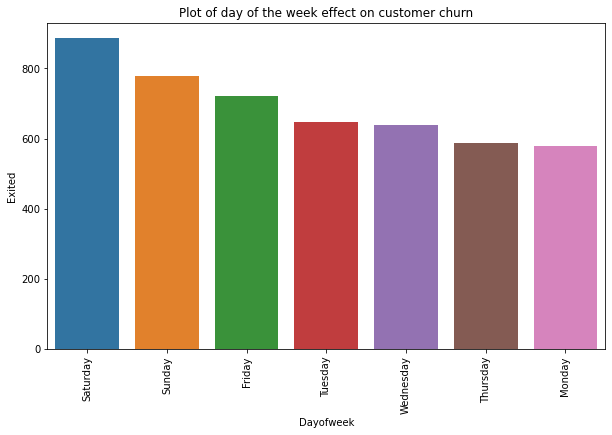

In [33]:
# plot to determine day of the week effect on customer churn
plot_snsbar(telecom_df, 'dayofweek', 'exited', 'Plot of day of the week effect on customer churn')

We can see that most churn occured during the weekend. With this knowledge, Interconnect telecom can introduce incentives and weekend service bonuses to ensure customers do not disconnect their services over the weekend.

### What months had the most churn and how can it be prevented?

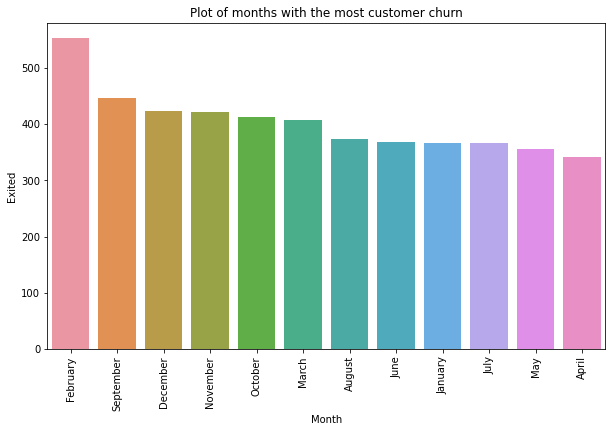

In [34]:
# plot to determine months with the most churn
plot_snsbar(telecom_df, 'month', 'exited', 'Plot of months with the most customer churn')

From the plot above, the months of February, September, November and December had the most churn. With this understanding, Interconnect telecoms can introduce several bonuses, free service plans, free movie streaming services or discounted TV streaming services for six months starting from September to February. This will prevent customer churn during those period.

#### Conclusion

We can conclude the following from the exploratory data analysis done:
 - Most of Interconnect customers prefer month-to-month payment with 61% of payment done using month-to-month
 - Payment made with electronic check had the highest total charges and thus will bring in the most revenue
 - Customers on a two-year contract have the highest total charges and bring in more total revenue than customers on a one year contract. 
 - Customers on a two-year contract churn less than other contract type.
 - Customers with more than 5 services at a time churn less 
 - Most churn occured at weekends.
 
 
**Action plan:**
 - The marketing team at Interconnect can introduce more two year contract plan to entice more customers to sign up for a two year contract.
 - Targeted marketing campaigns and promotional events should be done to promote the two-year plan to Interconnects customers
 - Customers should be encouraged to make payment using electronic check. This will increase Interconnect's revenue.
 - Incentivize services with serveral promos to induce more customers signing up for more services at a time.
 - Introduce serveral bonuses, free service plans, free streaming services or discounted TV streaming services for six months starting from September to February to prevent churn.
 - Special promotional events and services options should be introduced towards the end of the week to discourage client churn

<div id="model_training">
    <h2>Model Training</h2> 
</div>

Here, we would train different models. We would be training a couple of tree-based models, gradient-boosted model and leaf-based model. The primary metric we chose to evaluate the model is AUC-ROC. The secondary metric is accuracy. AUC computes the area under the curve and the objective is to **maximize** this area. Accuracy tells us how often the classifier is correct and the objective is to **maximize** accuracy. 

### Feature Engineering for Machine Learning

We perform feature engineering to encode all categorical features to numeric. Encoding features makes them useful for machine learning. We would be applying one-hot encoding, target encoding and ordinal encoding depending on the machine learning algorithm. We would be training the following models:

| Model type | Model | Encoding type | Highlight |
|--- |----:|:---:|:---:|
| Tree-based | Decision Tree | label encoding | Prone to errors |
|            | Random Forest | label encoding | Better than DT |
| Leaf-based | Catboost      | No encoding    | Fastest algo  |
| Gradient-boosted | XGBoost | One-hot encoding | Pretty fast |

For tree based model we make use of label encoding and one-hot encoding for the XGBoost model. The CatBoost regressor has its own implementation for encoding of categorical features. In this case, we create a separate dataset without any encoding. Internally, catboost encodes the categorical features. 

In [57]:
# drop unimportant features
df = telecom_df.drop(['customer_id', 'begin_date', 'end_date', 'end_date_value'], axis=1)

In [52]:








# one-hot encoding of categorical features
df_ohe = pd.get_dummies(df, drop_first=True) 
    
# declare variables for features and target
target = df_ohe['Exited']
features = df_ohe.drop(['Exited'], axis=1)
    
# split data into training and testing 
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.30, random_state=12345
)

# display the shape of the split dataset
print('The train set now contains {}'.format(features_train.shape[0]) + ' observations representing 70% of the data')
print('The test set now contains {}'.format(features_test.shape[0]) + ' observations representing 30% of the data')
print()

# numeric features in dataset
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
           'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# features scaling
scaler = StandardScaler()
scaler.fit(features_train[numeric])
# transform the training set and the test set using transform()
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric]  = scaler.transform(features_test[numeric])
    
print("\033[1m" + 'Shape of features and target' + "\033[0m")
print('-'*30)
print('Train features :', features_train.shape)
print('Train target   :',target_train.shape)
print('Test features  :',features_test.shape)
print('Test target    :',target_test.shape)
print()
display(features_train.head())

,customer_id,begin_date,end_date,end_date_value,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,...,streaming_tv,streaming_movies,dayofweek,month,year,tenure,has_crcard,exited,service_count,has_dependents
0,5575-GNVDE,2017-04-01,No,2022-01-01 10:35:34.082657,One year,No,Mailed check,56.950001,1889.500000,Male,...,No,No,Saturday,April,2017,5,0,0,2,0
1,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,2019-12-01 00:00:00.000000,Month-to-month,Yes,Mailed check,53.849998,108.150002,Male,...,No,No,Tuesday,October,2019,0,0,1,2,0
2,9237-HQITU,2019-09-01,2019-11-01 00:00:00,2019-11-01 00:00:00.000000,Month-to-month,Yes,Electronic check,70.699997,151.649994,Female,...,No,No,Sunday,September,2019,0,0,1,0,0
3,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,2019-11-01 00:00:00.000000,Month-to-month,Yes,Electronic check,99.650002,820.500000,Female,...,Yes,Yes,Friday,March,2019,0,0,1,3,0
4,1452-KIOVK,2018-04-01,No,2022-01-01 10:35:34.085650,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,Male,...,Yes,No,Sunday,April,2018,4,1,0,2,1


Here, we would train different models. 
- We split the data into 80% training and 20% testing sets
- We use AUC-ROC as our primary metric and accuracy as the secondary metric to predict customer churn
- We apply encoding to categorical variables so they can be read by our machine learning models
- We scale the data by applying standard scaler function to the features
- We will use linear regresion model as our baseline model
- We train different tree based model and gradient boosting model
- We apply hyperparameter tuning to tune our different model and cross validation during sampling of data for machine learning
- We choose the best performing models on the training accuracy and AUC-ROC metric

<div id="model_testing">
    <h2>Model Testing</h2> 
</div>

- Using the best performing model, we evaluate on the test dataset
- The best performing model is one that has the best accuracy on the training set
- We plot a confusion matrix for the models performance on the test sets
- We determine the best model's accuracy on the test set

<div id="model_analysis">
    <h2>Model Analysis</h2> 
</div>

<div id="overall_conclusion">
    <h2>Overall Conclusion</h2> 
</div>

- Based on chosen model, we can predict customer churn for Interconnect telecoms